In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Housing.csv')  # Upload Housing.csv in Colab

# One-hot encode categorical variables (convert to numeric)
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [3]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('price', axis=1)   # Features
y = df_encoded['price']                # Target (price)

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression

# Create model and fit to training data
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 970043.4039201636
Mean Squared Error (MSE): 1754318687330.6638
R² Score: 0.6529242642153184


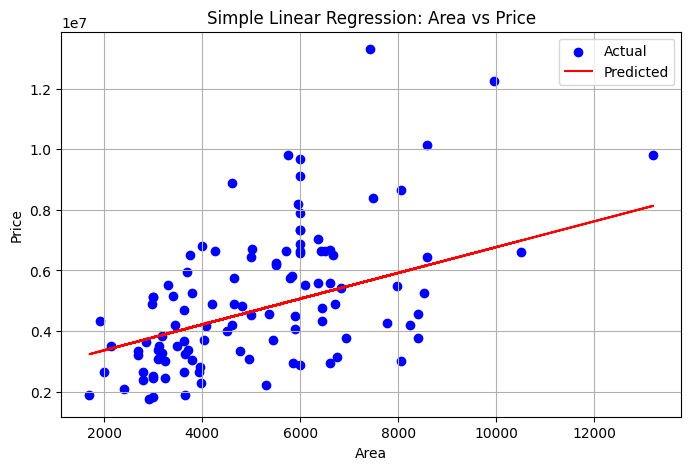

In [9]:
X_simple = df[['area']]
y_simple = df['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)
y_pred_s = model_s.predict(X_test_s)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Predicted')
plt.title('Simple Linear Regression: Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


